In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


In [2]:
df = pd.read_csv('C:/Users/pande/Job-Description-Skills-Extractor/data/collected_data/df_description_processed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Description         5379 non-null   object
 1   lower_description   5379 non-null   object
 2   word_tokenized      5379 non-null   object
 3   sentence_tokenized  5379 non-null   object
 4   word_count          5379 non-null   int64 
 5   sentence_count      5379 non-null   int64 
 6   clean_words         5379 non-null   object
 7   clean_stemmed       5379 non-null   object
 8   clean_lemmed        5379 non-null   object
dtypes: int64(2), object(7)
memory usage: 378.3+ KB


In [3]:
# create the transform
vectorizer = CountVectorizer(stop_words = 'english')
# tokenize and build vocab
bag_of_words = vectorizer.fit_transform(df.clean_lemmed)
# summarize
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

[('data', 53690),
 ('experience', 27489),
 ('business', 14210),
 ('team', 12285),
 ('work', 11589),
 ('analysis', 9052),
 ('skill', 8872),
 ('year', 8555),
 ('analytics', 8459),
 ('ability', 8236)]

In [4]:
df_counts = pd.DataFrame(dict(words_freq), index = ['frequency'])
df_counts = df_counts.T
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18646 entries, data to webgl
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   frequency  18646 non-null  int64
dtypes: int64(1)
memory usage: 291.3+ KB


In [5]:
df_counts

,frequency
data,53690
experience,27489
business,14210
team,12285
work,11589
...,...
mange,1
redshif,1
datapower,1
bottle,1


In [6]:

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 4), max_df = .10, stop_words='english', norm = 'l1')
vz = vectorizer.fit_transform(df.clean_lemmed)

vz.shape

(5379, 1876004)

In [18]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']
newDF=tfidf.sort_values(by='tfidf',ascending=True)
newDF[200:250]

E:\Anaconda\envs\myenvnew\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
statistic mathematics,4.022099
experience year experience,4.025923
wide variety,4.025923
team player,4.029762
drive business,4.033616
experience statistical,4.037484
degree year,4.037484
python scala,4.041368
scikit learn,4.041368
using data,4.045266


<AxesSubplot: >

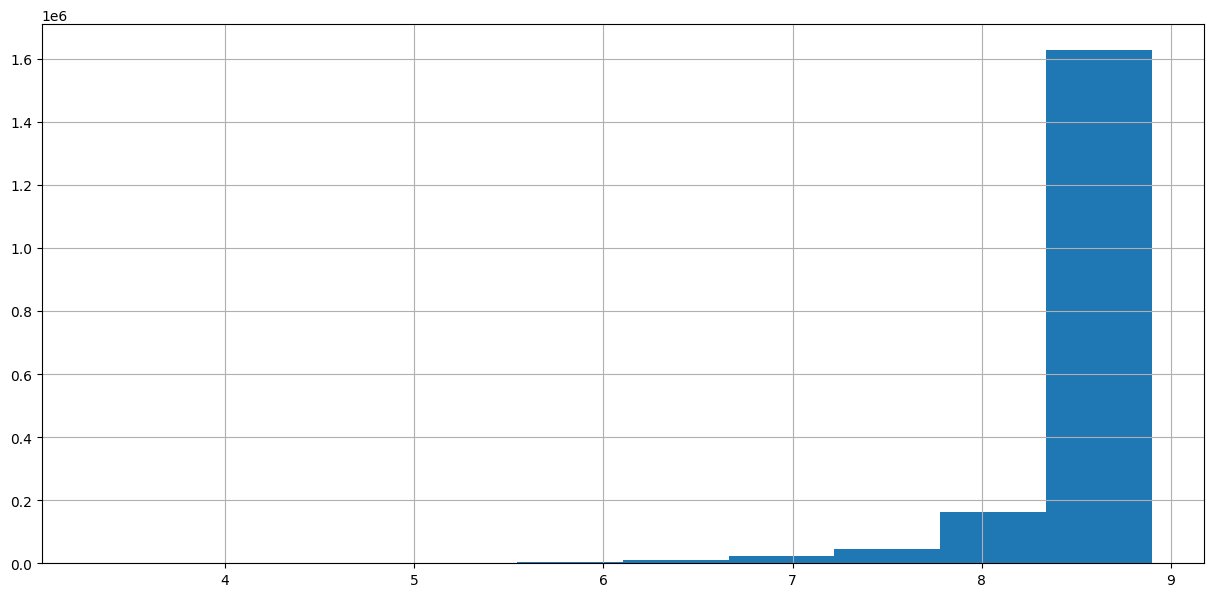

In [12]:
tfidf.tfidf.hist(figsize=(15,7))


In [13]:

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

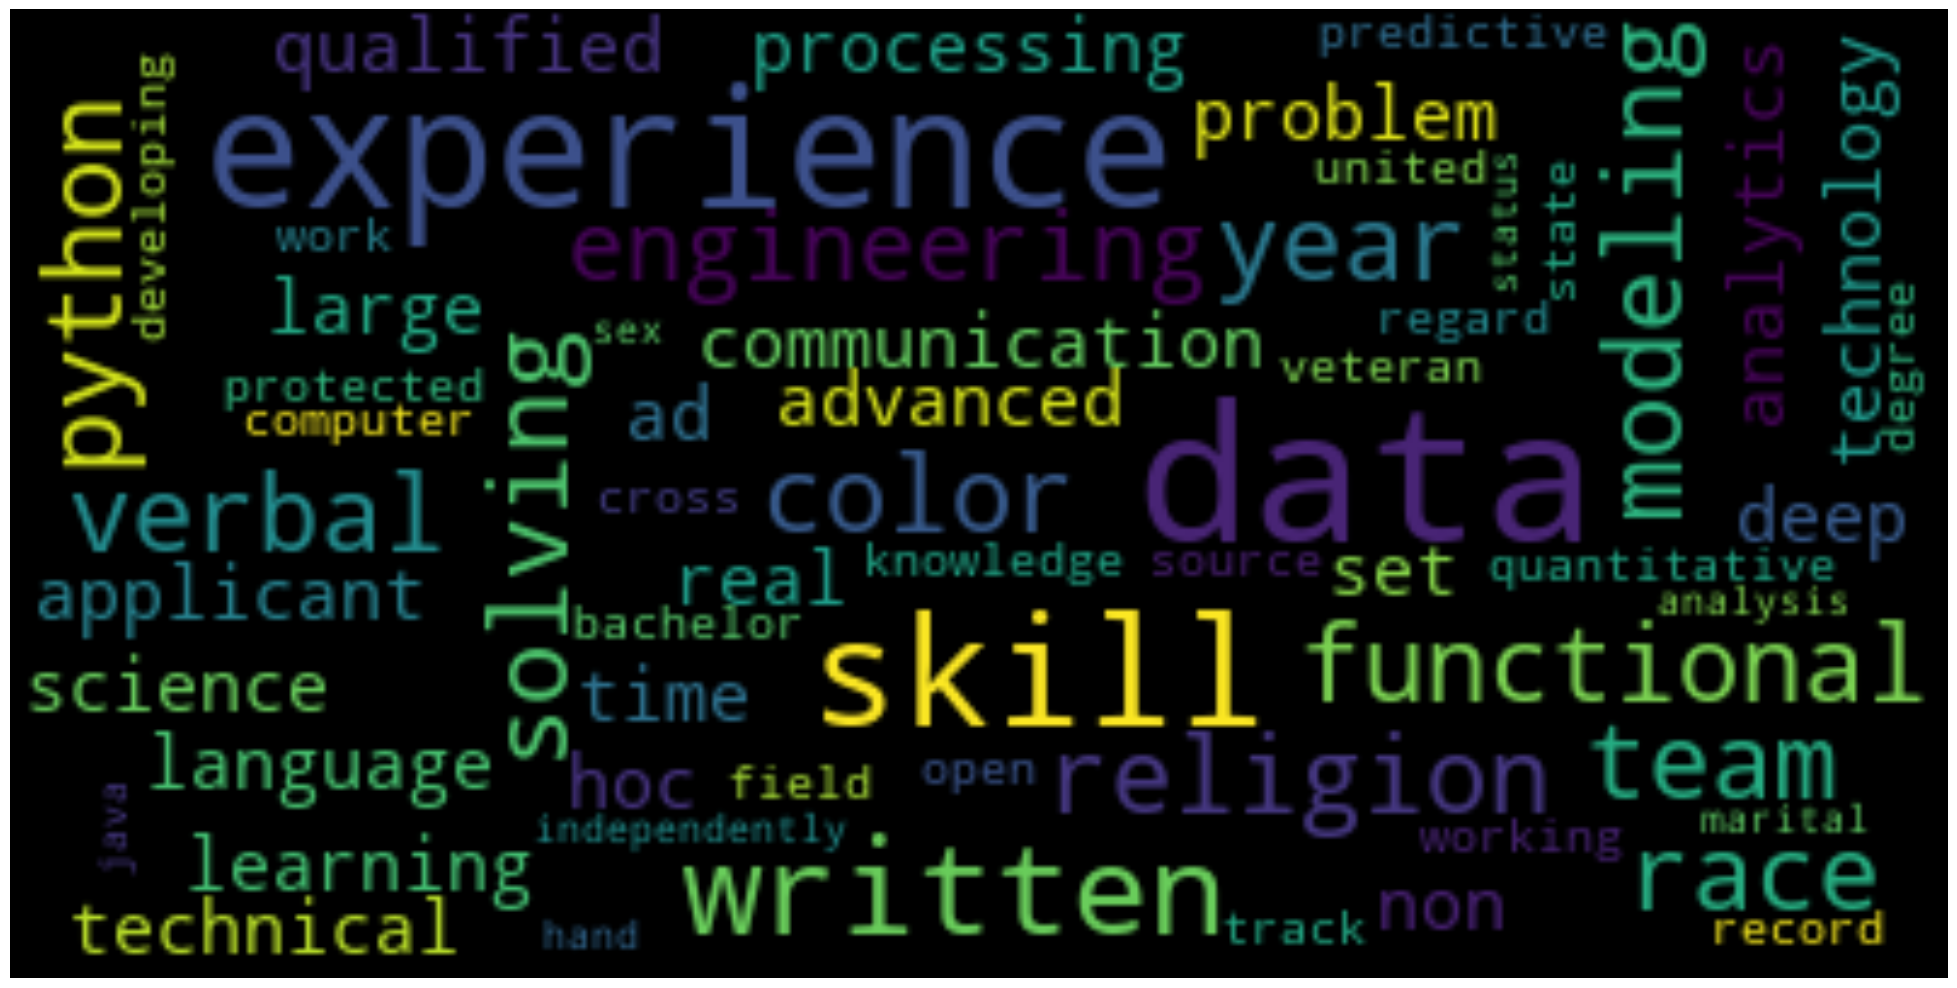

In [14]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))


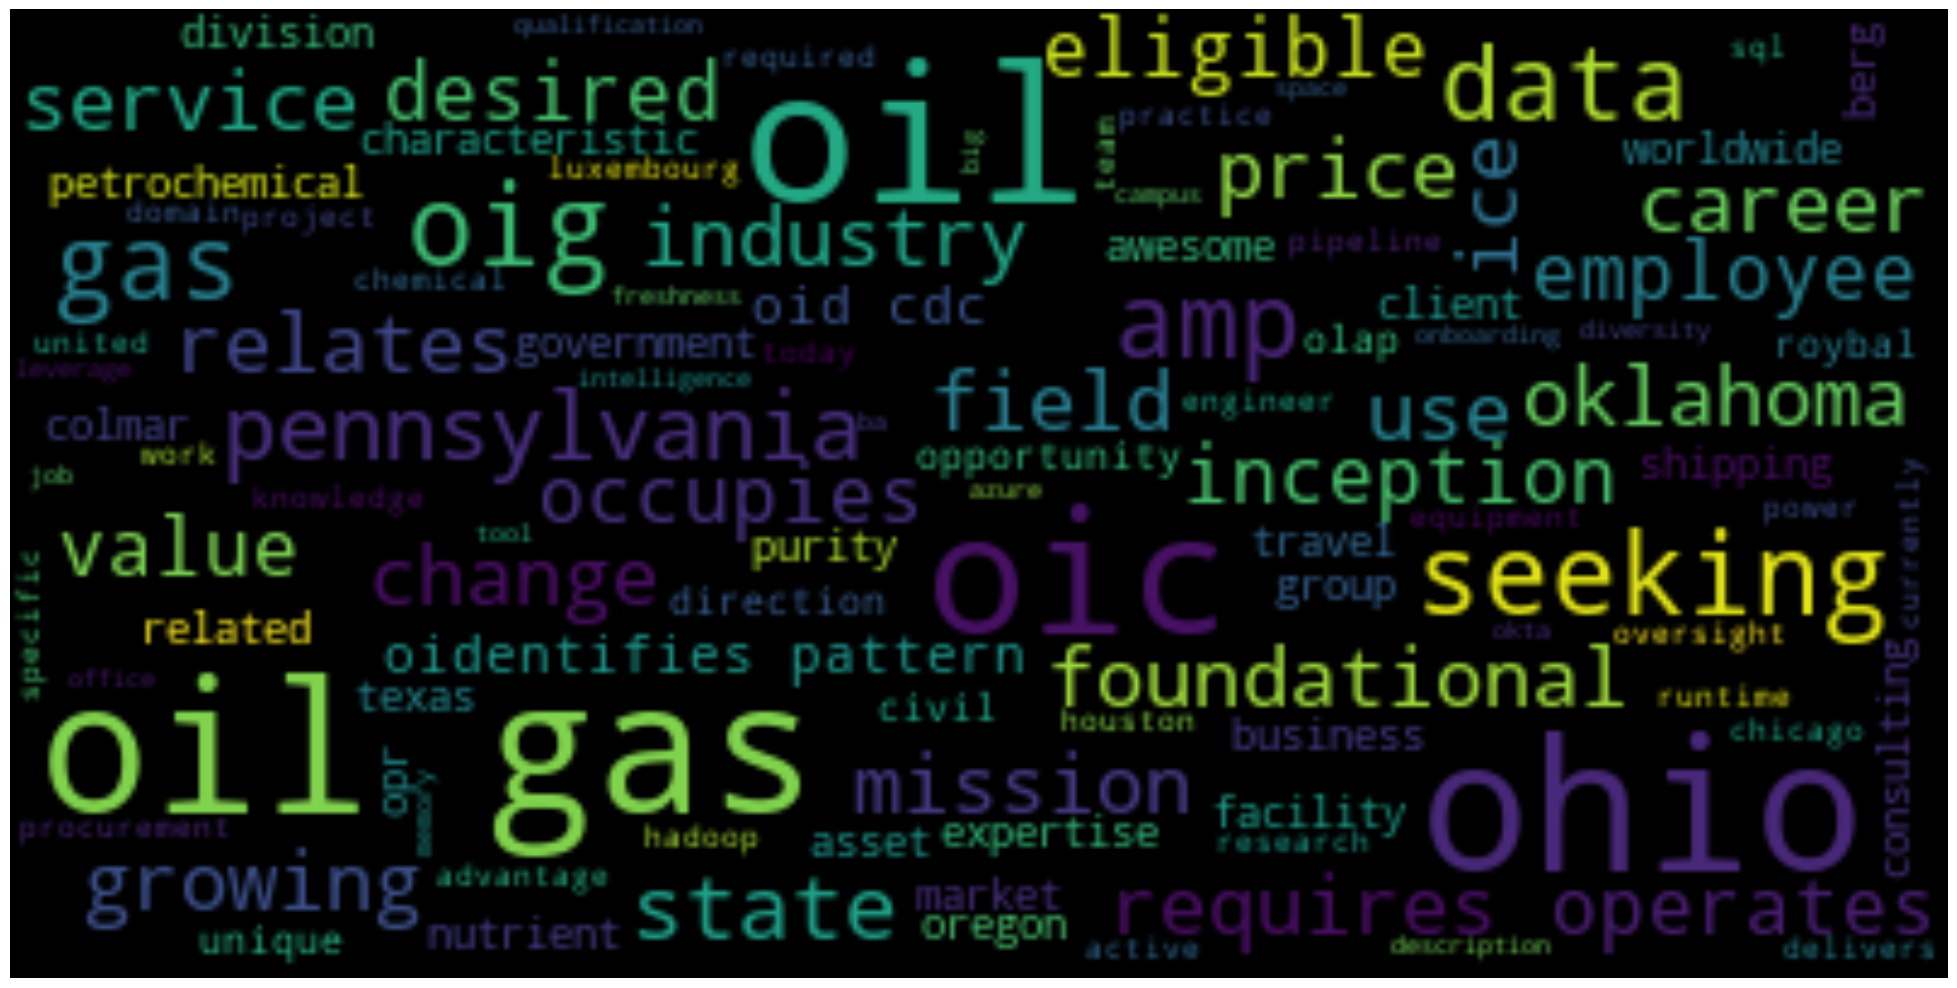

In [15]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(100))
